In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
# from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
df_path = '/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(df_path)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
# Вычисление корреляционной матрицы
plt.figure(figsize=(15, 15))
correlation_matrix = data.corr() # income.corr() вычисляет корреляционную матрицу для всех числовых колонок DataFrame.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # lобавляет цветовую градацию для визуального представления силы корреляции

<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


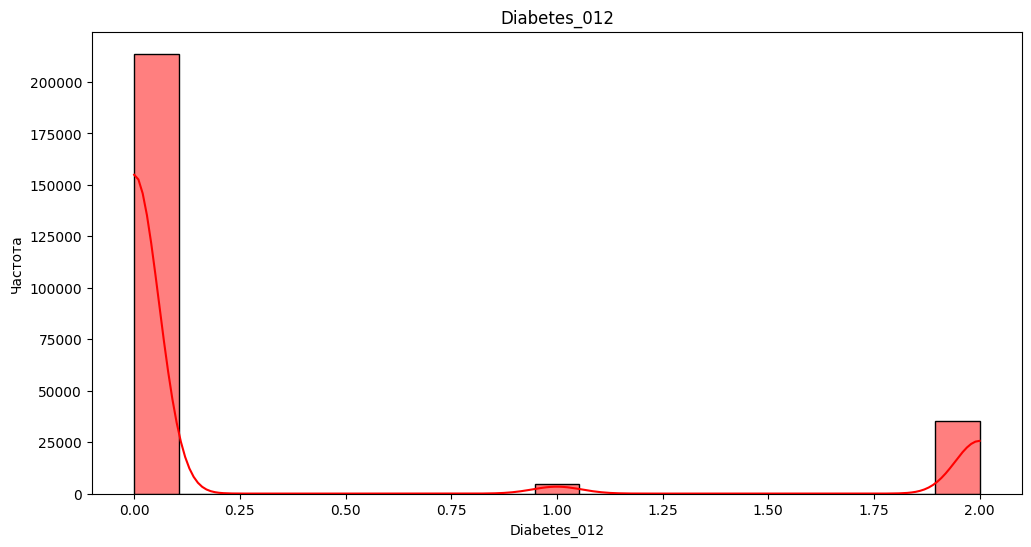

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


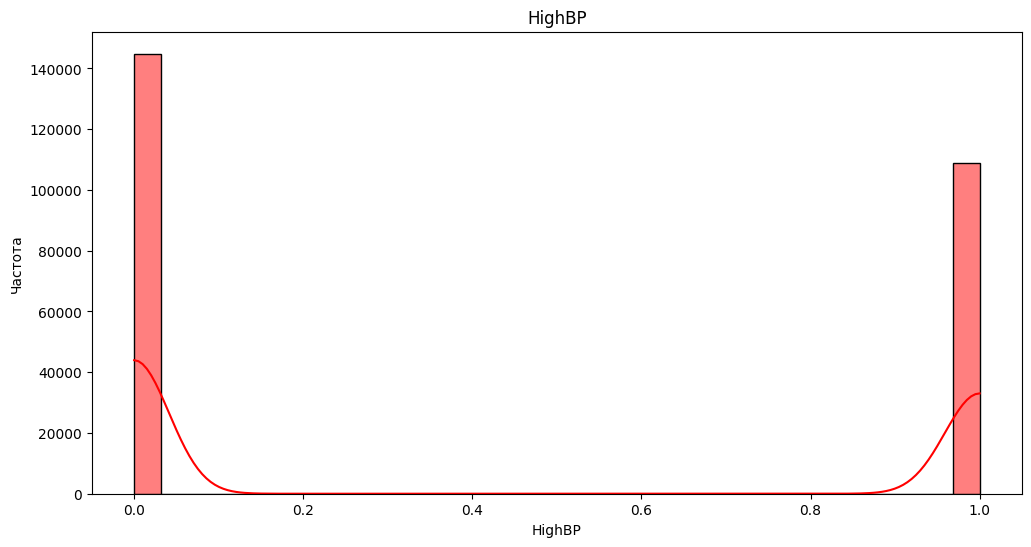

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


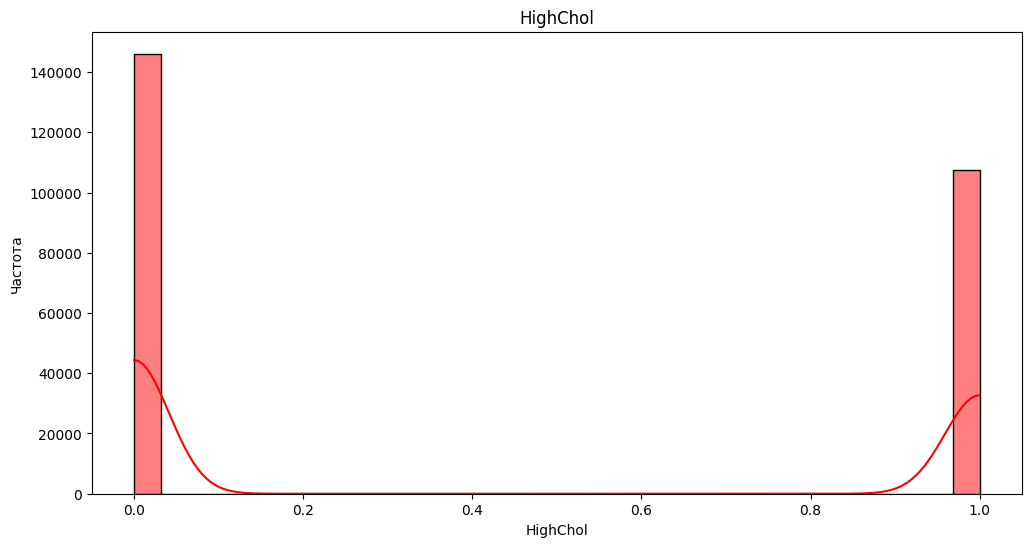

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


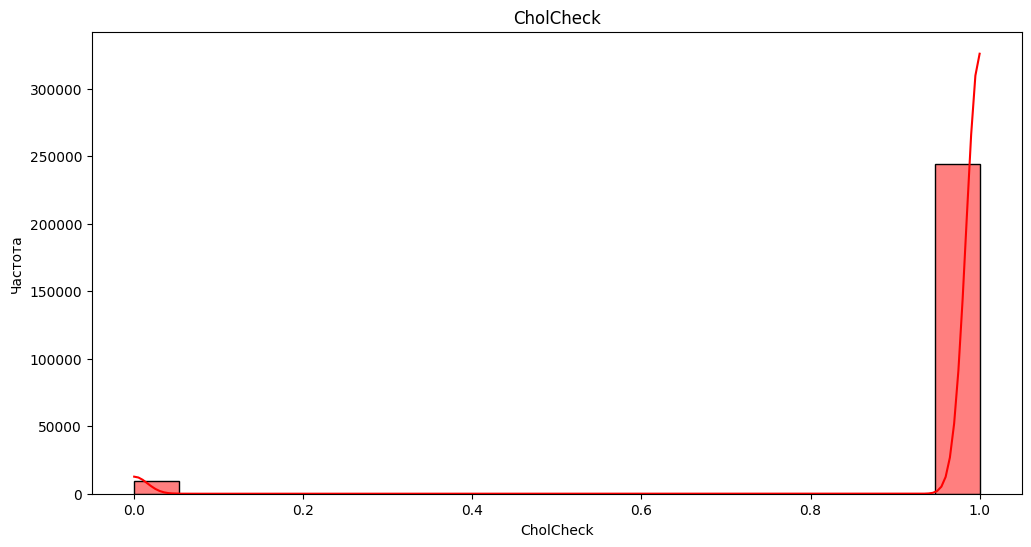

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


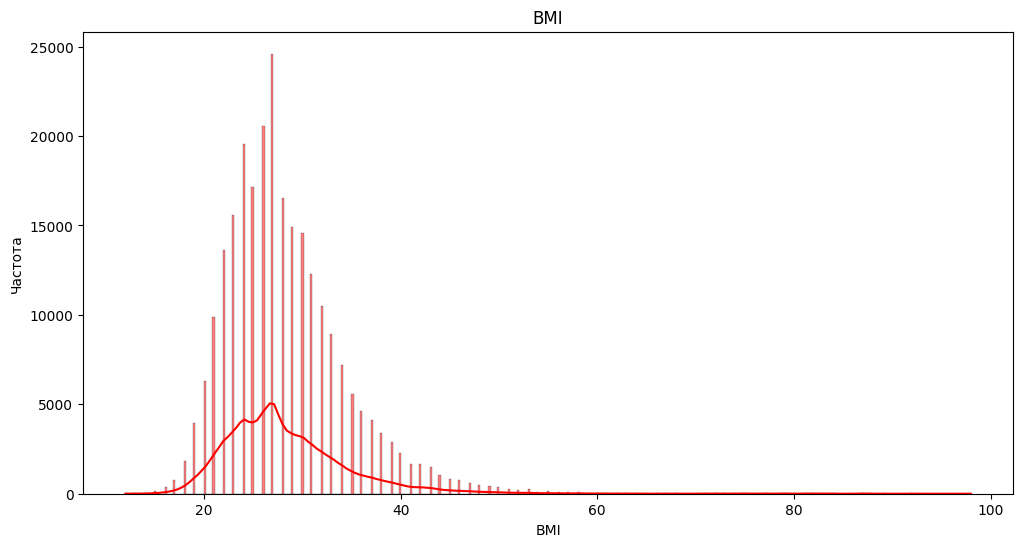

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


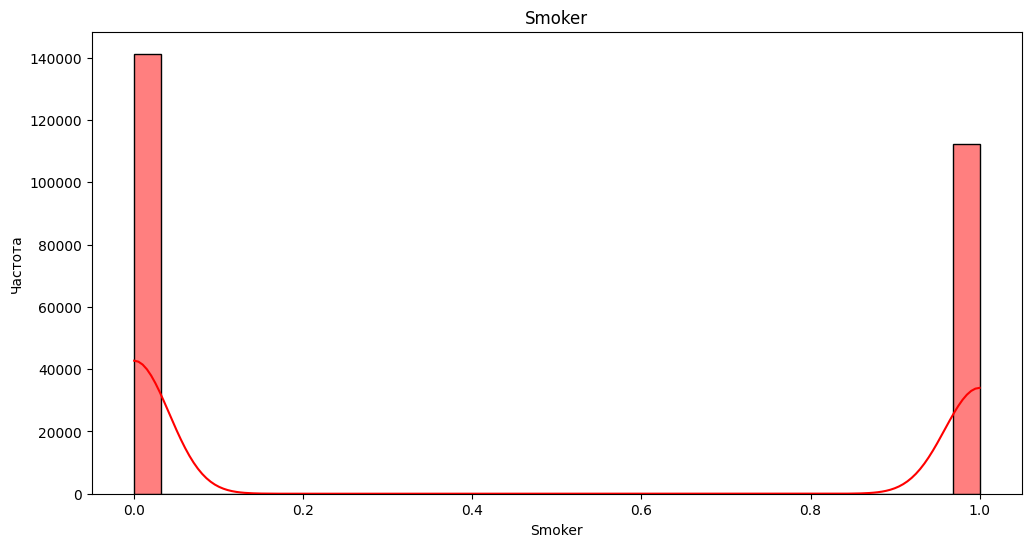

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


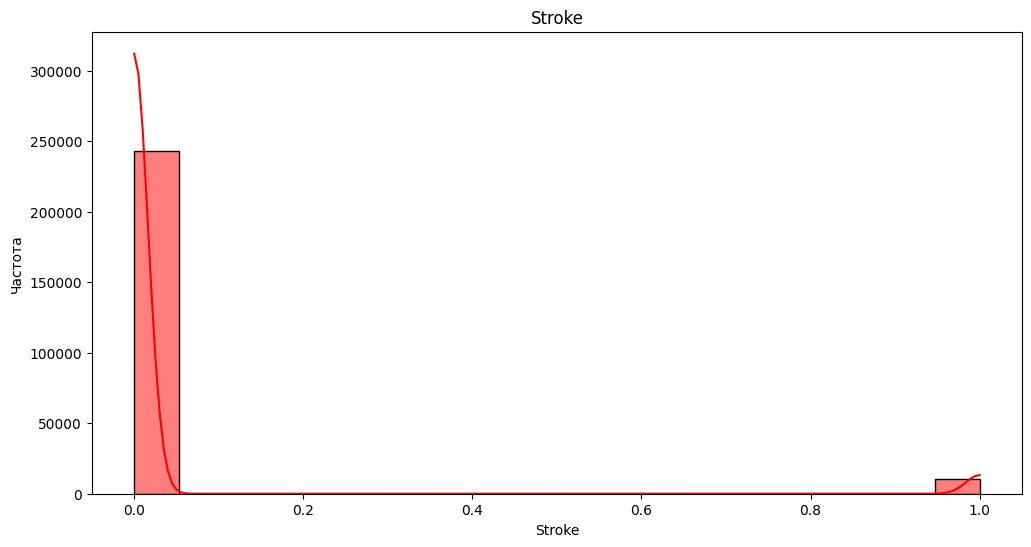

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


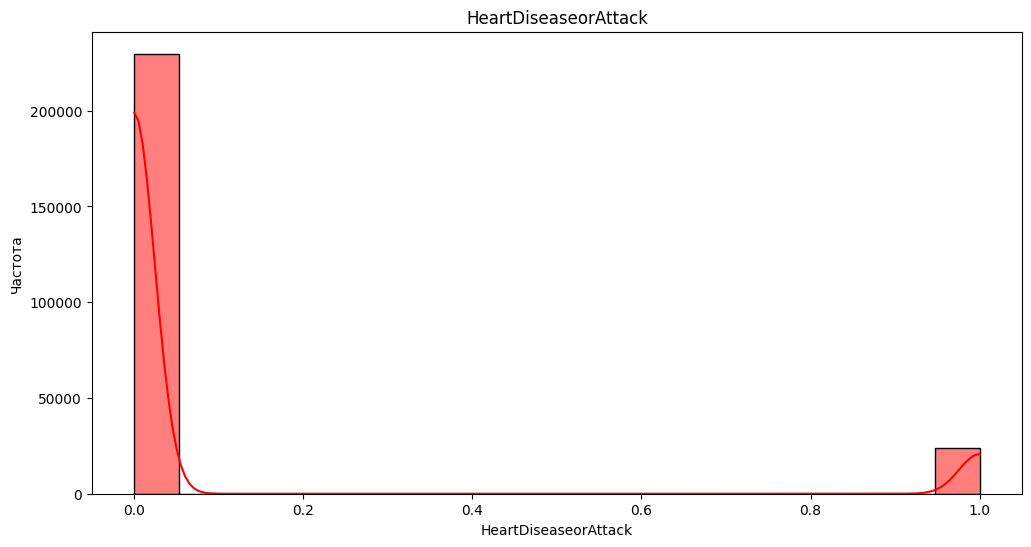

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


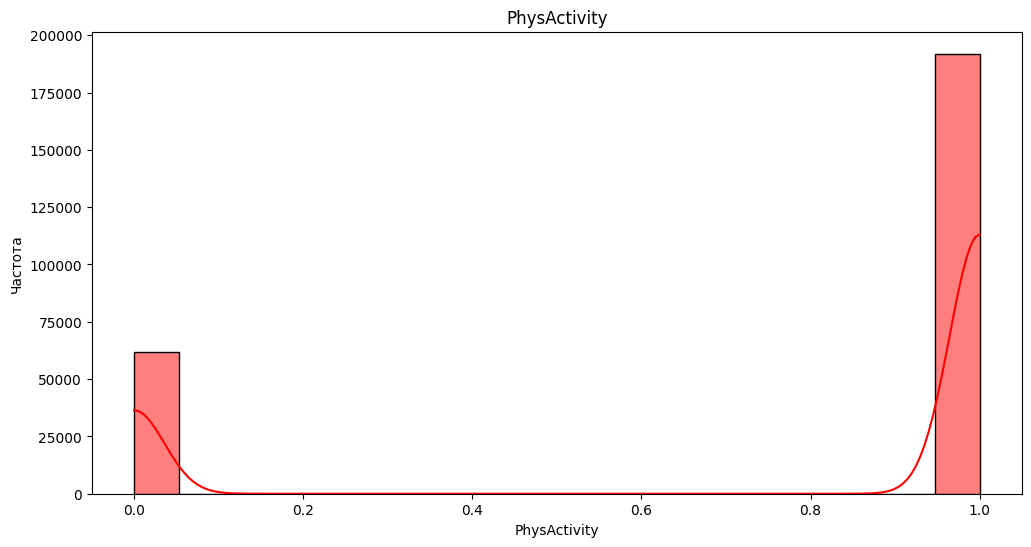

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


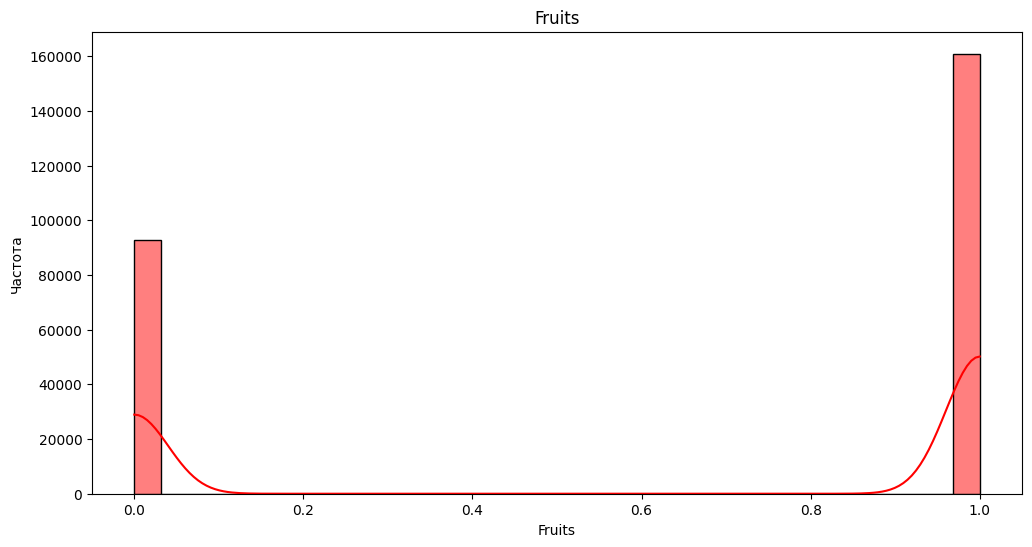

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


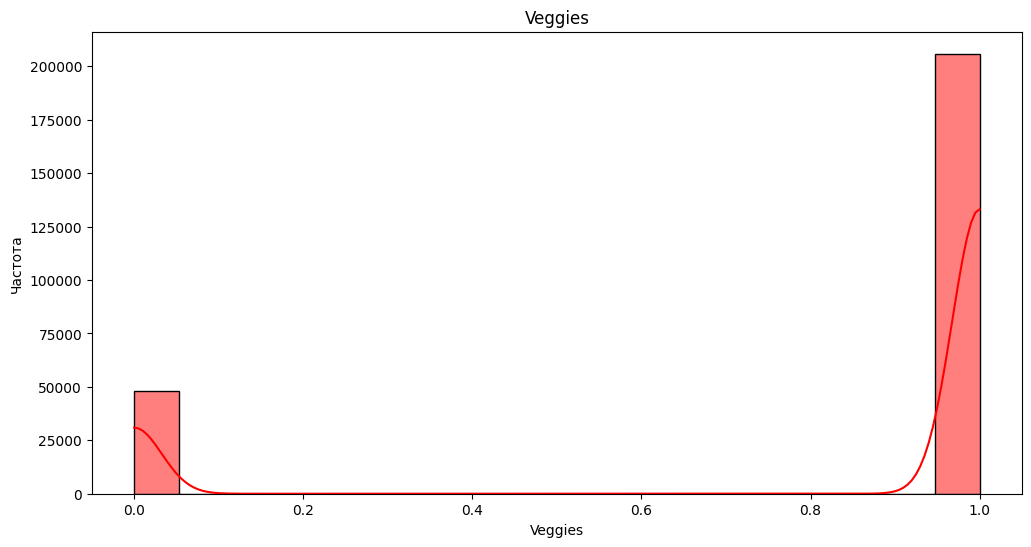

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


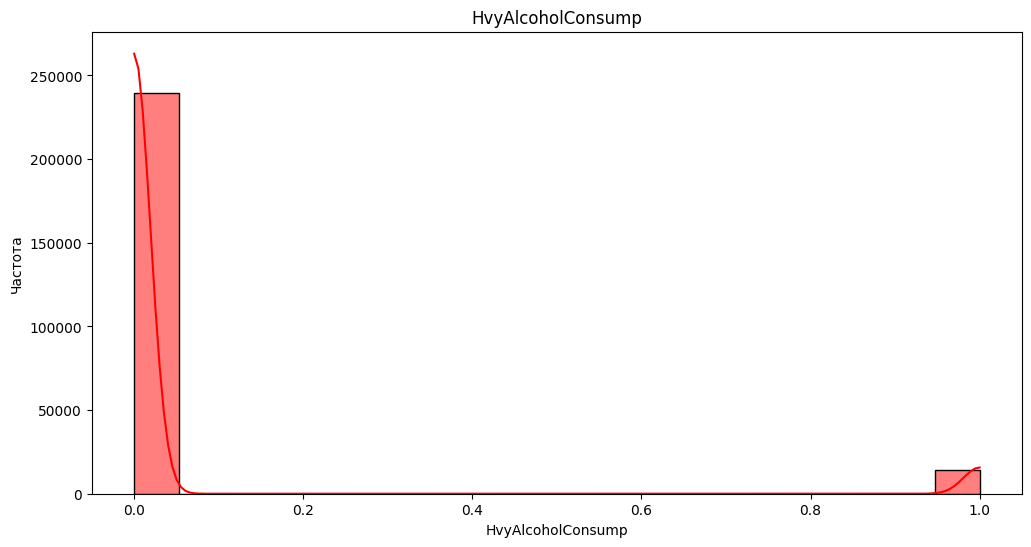

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


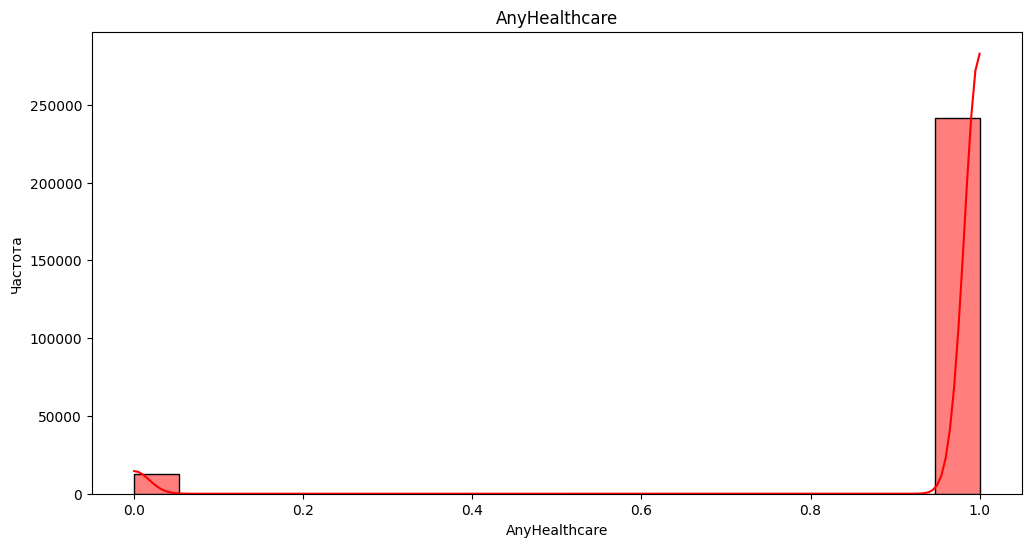

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


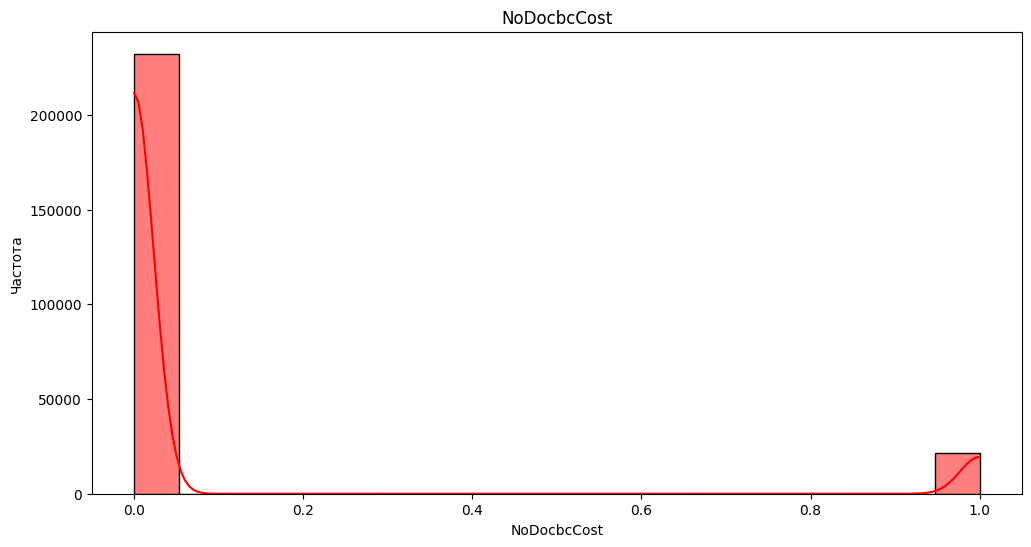

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


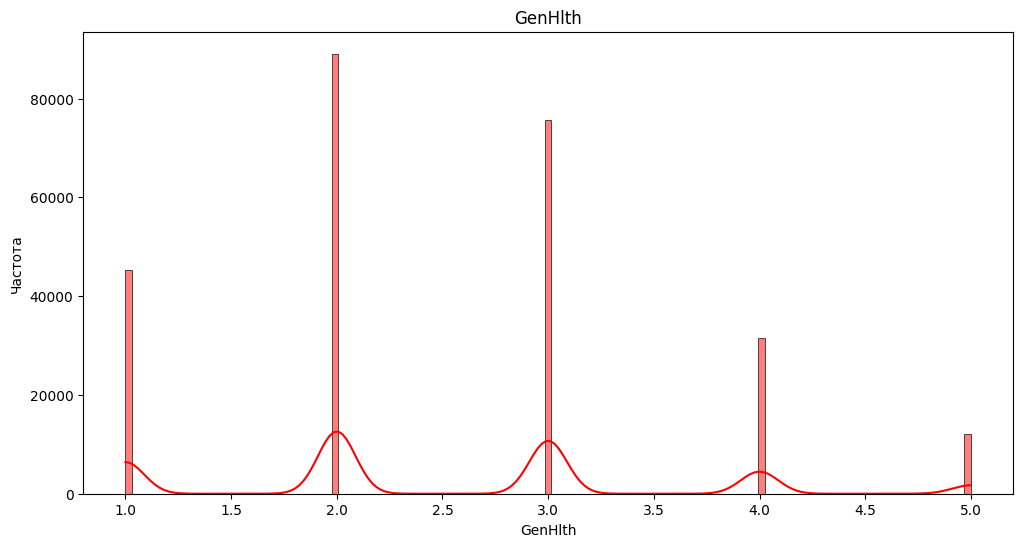

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


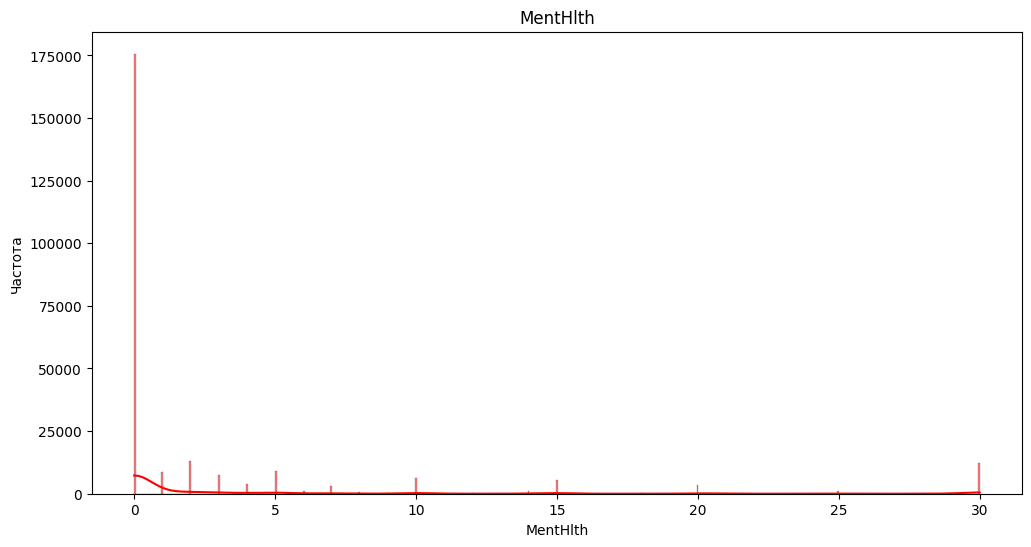

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


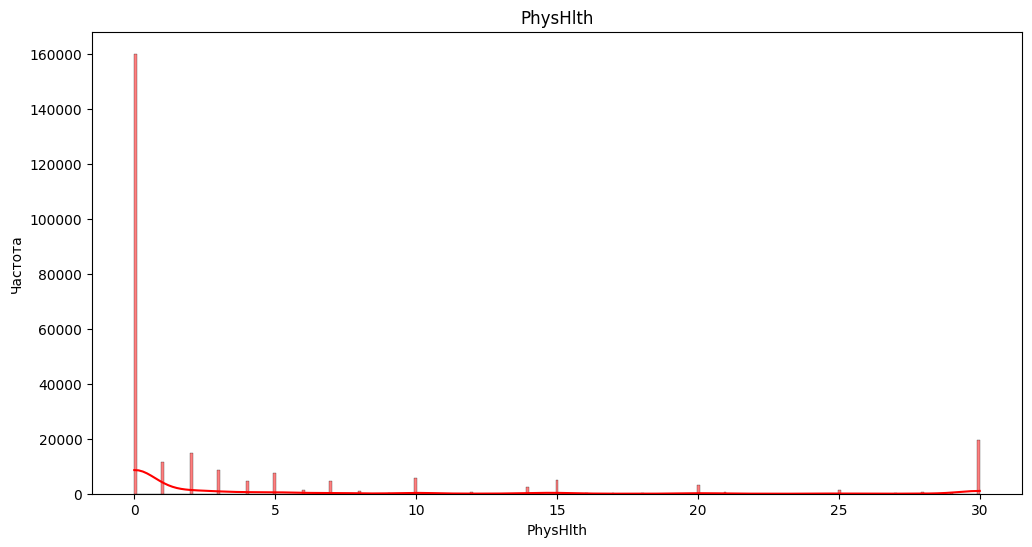

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


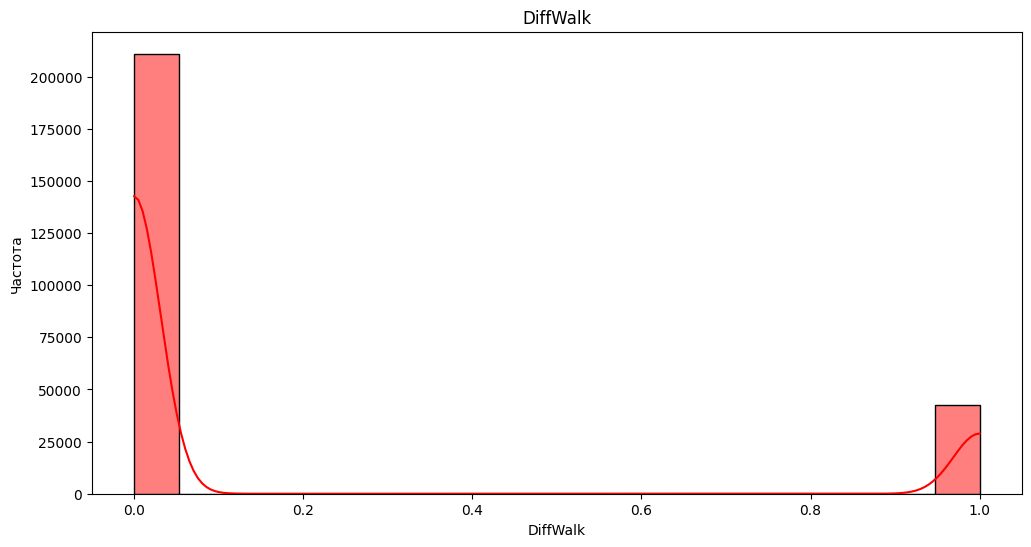

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


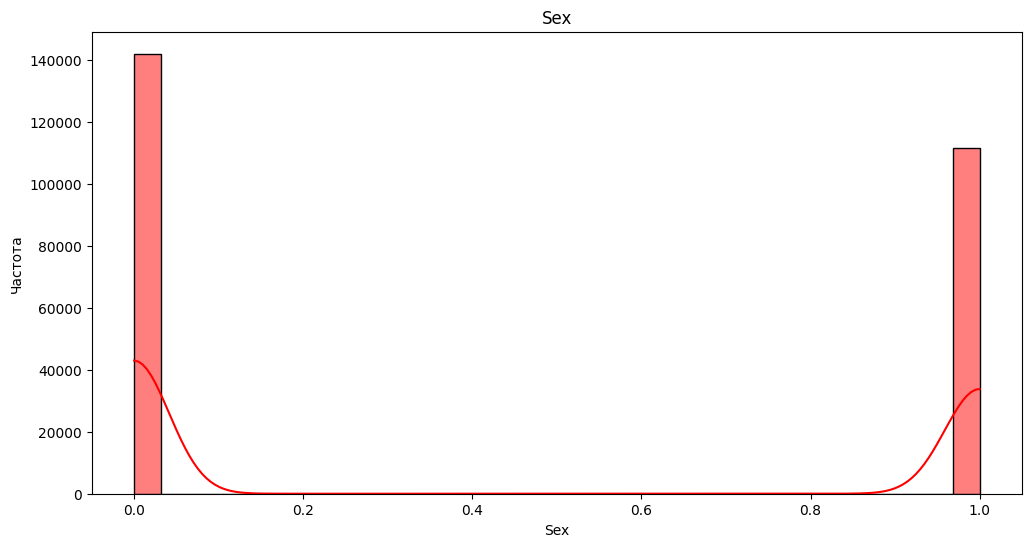

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


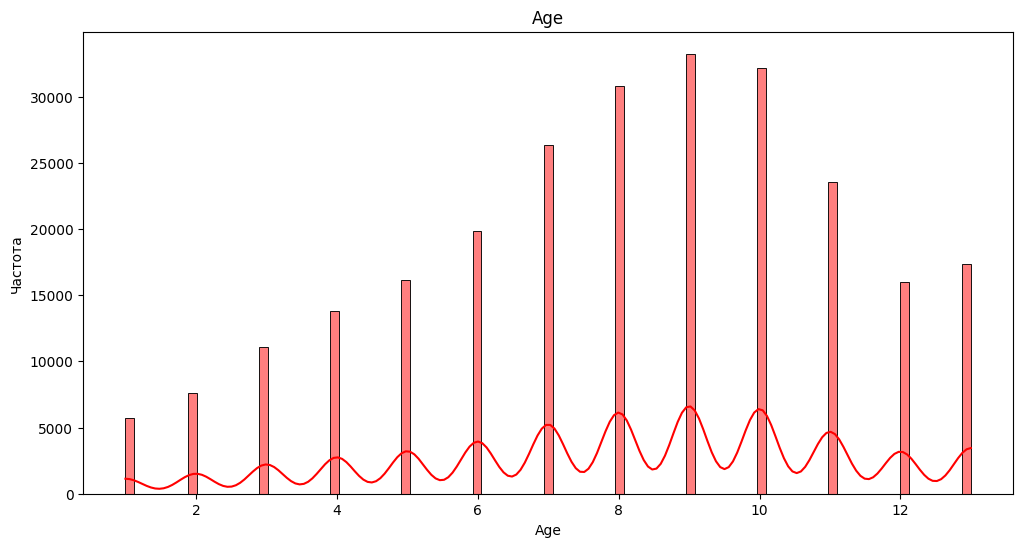

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


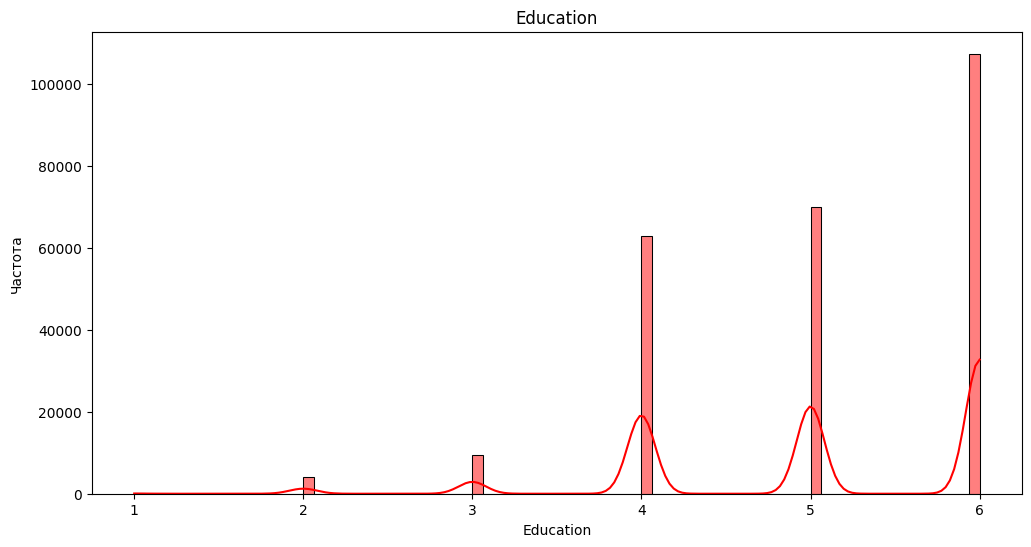

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


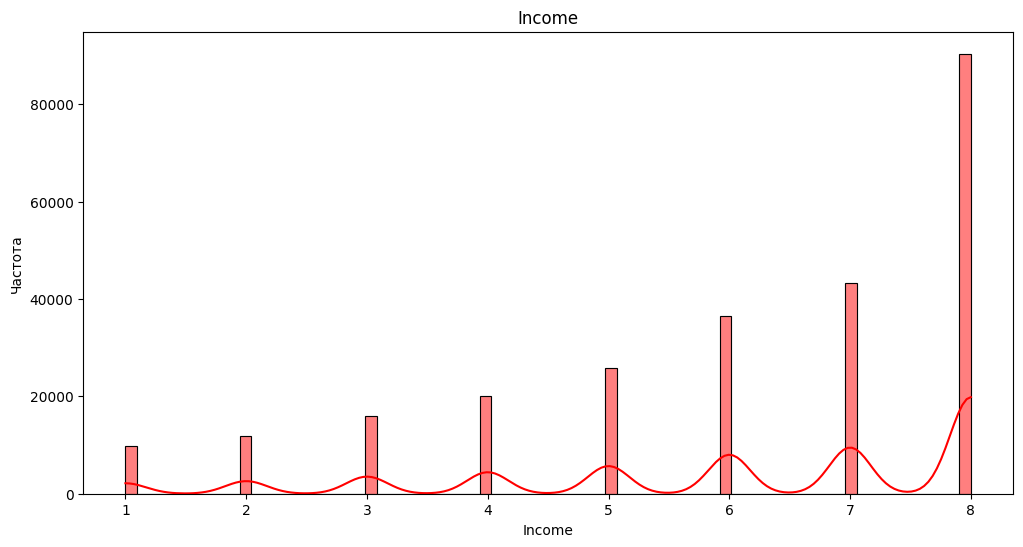

In [4]:
for column in data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], kde=True, color='red')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

Добавим новую фичу: глюкозу (с ней ничего не вышло) :(

In [5]:
# ГЛЮКЗОА
# import random
# np.random.seed(42)

# def apply_glucose(i):
#     if i==2:
#         return np.random.randint(125, 190)
#     elif i==1:
#         return np.random.randint(100, 124)
#     elif i==0:
#         return np.random.randint(70, 99)

# data["Glucose"] = data["Diabetes_012"].apply(apply_glucose)
# y_glucose = data["Glucose"]
# data = data.drop('Glucose', axis=1)

# X_glucose = data.drop(columns = ['Diabetes_012']).values  

# #Xg_train, Xg_test, yg_train, yg_test = train_test_split(X_glucose, y_glucose, test_size=0.2, random_state=0)

# model_glucose = CatBoostRegressor()
# model_glucose.fit(X_glucose, y_glucose, verbose=100)
# y_pred_glucose = model_glucose.predict(X_glucose)
# data['Glucose'] = y_pred_glucose
# data


Глянем, что у нас имеется в начале

In [6]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
X1= data.drop(columns = ['Diabetes_012']) 
y1 = data['Diabetes_012']

cat_features = [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for col in X1.columns[cat_features].tolist():
    X1[col] = X1[col].astype(int)
# print(X1.dtypes)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

model1 = CatBoostClassifier(cat_features=cat_features)
model1.fit(X1_train, y1_train, verbose=100)
y1_pred = model1.predict(X1_test)

Learning rate set to 0.103412
0:	learn: 0.9707260	total: 601ms	remaining: 10m
100:	learn: 0.3909151	total: 35.8s	remaining: 5m 19s
200:	learn: 0.3877569	total: 1m 10s	remaining: 4m 40s
300:	learn: 0.3855095	total: 1m 43s	remaining: 3m 59s
400:	learn: 0.3832905	total: 2m 17s	remaining: 3m 25s
500:	learn: 0.3813452	total: 2m 51s	remaining: 2m 51s
600:	learn: 0.3793716	total: 3m 26s	remaining: 2m 17s
700:	learn: 0.3772630	total: 4m 1s	remaining: 1m 43s
800:	learn: 0.3752884	total: 4m 37s	remaining: 1m 8s
900:	learn: 0.3735399	total: 5m 12s	remaining: 34.4s
999:	learn: 0.3716099	total: 5m 48s	remaining: 0us


In [10]:
print(classification_report(y1_test, y1_pred))
print(model1.score(X1_train, y1_train))
print(model1.score(X1_test, y1_test))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     53285
         1.0       0.00      0.00      0.00      1133
         2.0       0.58      0.19      0.29      9002

    accuracy                           0.85     63420
   macro avg       0.48      0.39      0.40     63420
weighted avg       0.81      0.85      0.81     63420

0.854709345106696
0.8498107852412489



* Precision (Точность) — сколько из предсказанных 1 действительно 1
* Recall (Полнота) — сколько из реальных 1 правильно предсказаны
* F1-score — гармоническое среднее precision и recallSupport — количество примеров каждого класса в y_test
* Accuracy (Точность всей модели) — доля верно предсказанных примеров


Посмотрим на ошибки

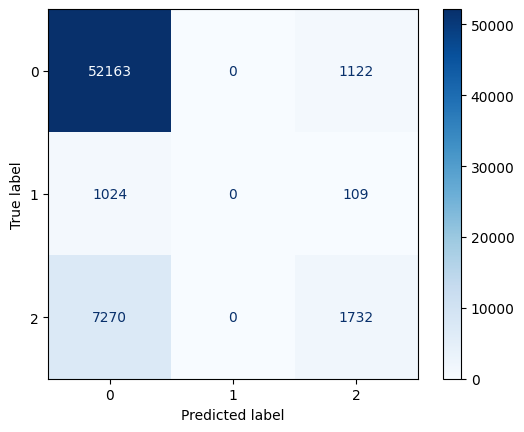

In [11]:
cm = confusion_matrix(y1_test, y1_pred)  # Матрица ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Визуализация
plt.show()

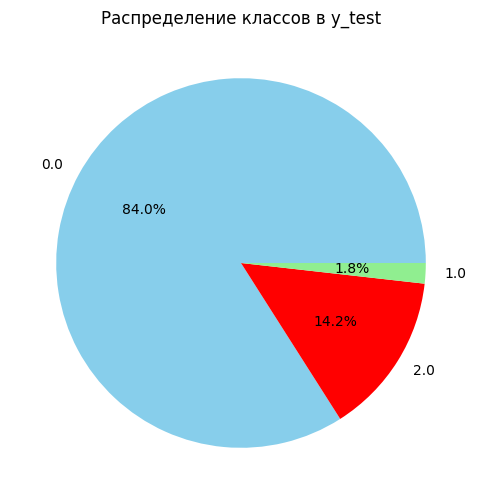

In [12]:
# Подсчёт количества каждого класса
class_counts = pd.Series(y1_test).value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'red', 'lightgreen'])
plt.title("Распределение классов в y_test")
plt.show()

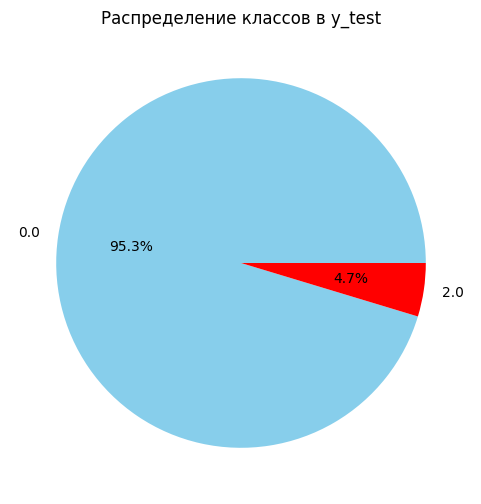

In [14]:
# Подсчёт количества каждого класса
class_counts = pd.Series(y1_pred[:,0]).value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'red', 'lightgreen'])
plt.title("Распределение классов в y_test")
plt.show()

Ну, неплохо. Но он не видит преддиаебет(1). Потому что выборка очень малькая.
Попробуем увеличть значимость образцов значенения 1

In [15]:
pd.Series(data['Diabetes_012']).value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [16]:
smote = SMOTE(
    sampling_strategy={1: 15_000, 2: 40_346}, #data: 0.0-213703; 1.0-4631; 2.0-35346; #y2_train: 0.0-171086; 2.0-28135; 1.0-3723
    random_state=None,         # Зерно для генератора случайных чисел.
    k_neighbors=3,             # Количество ближайших соседей для создания синтетических примеров.
    n_jobs=1                   # Количество ядер для параллельной работы. -1 означает использование всех доступных ядер.
)


X2 = data.drop(columns = ['Diabetes_012'])  
y2 = data['Diabetes_012'].values

cat_features = [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for col in X2.columns[cat_features].tolist():
    X2[col] = X2[col].astype(int)
#print(X1.dtypes)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

X_resampled, y_resampled = smote.fit_resample(X2_train, y2_train)
model2 = CatBoostClassifier(
    iterations=2_000, 
    depth=5, 
    learning_rate=0.05,
    cat_features=cat_features, 
    #class_weights=[5, 11, 9], 
    #class_weights=[1, 8, 3], 
    #early_stopping_rounds=50
)
#model2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model2.fit(X_resampled, y_resampled, verbose=100)

y2_pred = model2.predict(X2_test)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


0:	learn: 1.0516887	total: 439ms	remaining: 14m 36s
100:	learn: 0.5632683	total: 36.6s	remaining: 11m 28s
200:	learn: 0.5464479	total: 1m 12s	remaining: 10m 47s
300:	learn: 0.5379887	total: 1m 47s	remaining: 10m 6s
400:	learn: 0.5281305	total: 2m 23s	remaining: 9m 31s
500:	learn: 0.5204434	total: 2m 57s	remaining: 8m 52s
600:	learn: 0.5156769	total: 3m 31s	remaining: 8m 12s
700:	learn: 0.5109164	total: 4m 5s	remaining: 7m 35s
800:	learn: 0.5073101	total: 4m 39s	remaining: 6m 58s
900:	learn: 0.5038382	total: 5m 14s	remaining: 6m 23s
1000:	learn: 0.5013612	total: 5m 48s	remaining: 5m 47s
1100:	learn: 0.4993906	total: 6m 20s	remaining: 5m 10s
1200:	learn: 0.4974531	total: 6m 53s	remaining: 4m 35s
1300:	learn: 0.4952877	total: 7m 27s	remaining: 4m
1400:	learn: 0.4933921	total: 8m 2s	remaining: 3m 26s
1500:	learn: 0.4913607	total: 8m 37s	remaining: 2m 51s
1600:	learn: 0.4896358	total: 9m 12s	remaining: 2m 17s
1700:	learn: 0.4881342	total: 9m 46s	remaining: 1m 43s
1800:	learn: 0.4865929	tota

In [17]:
print(classification_report(y2_test, y2_pred))
print(model2.score(X2_train, y2_train))
print(model2.score(X2_test, y2_test))

#               precision    recall  f1-score   support

#          0.0       0.87      0.97      0.92     42617
#          1.0       0.04      0.00      0.00       908
#          2.0       0.54      0.25      0.34      7211

#     accuracy                           0.85     50736
#    macro avg       0.48      0.41      0.42     50736
# weighted avg       0.81      0.85      0.82     50736

# 0.8537576868495743
# 0.8480566067486597

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42617
         1.0       0.07      0.00      0.00       908
         2.0       0.54      0.26      0.35      7211

    accuracy                           0.85     50736
   macro avg       0.49      0.41      0.42     50736
weighted avg       0.81      0.85      0.82     50736

0.8533092872910754
0.8478989277830338


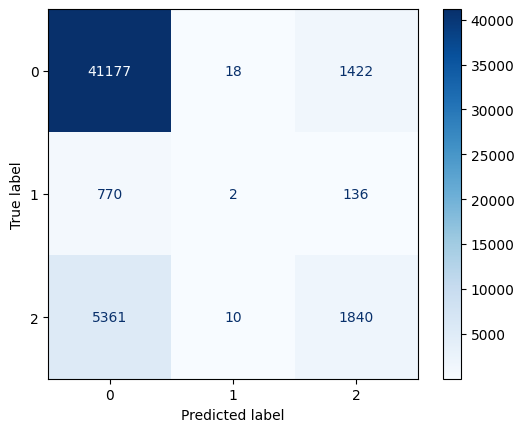

In [18]:
cm = confusion_matrix(y2_test, y2_pred)  # Матрица ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Визуализация
plt.show()

In [19]:
y2_pred[:,0]

array([0., 0., 0., ..., 0., 0., 2.])

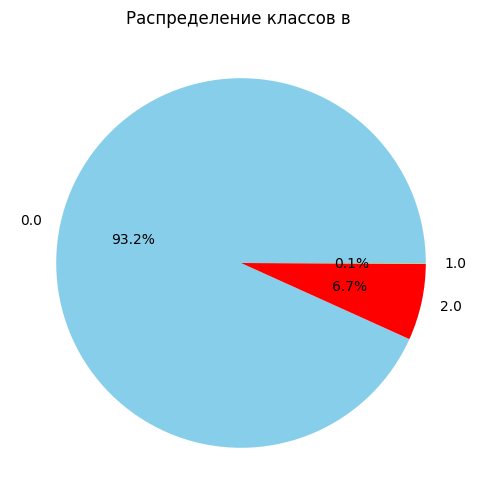

In [20]:
# Подсчёт количества каждого класса
class_counts = pd.Series(y2_pred[:,0]).value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'red', 'lightgreen'])
plt.title("Распределение классов в ")
plt.show()

Глянем на важность признаков:

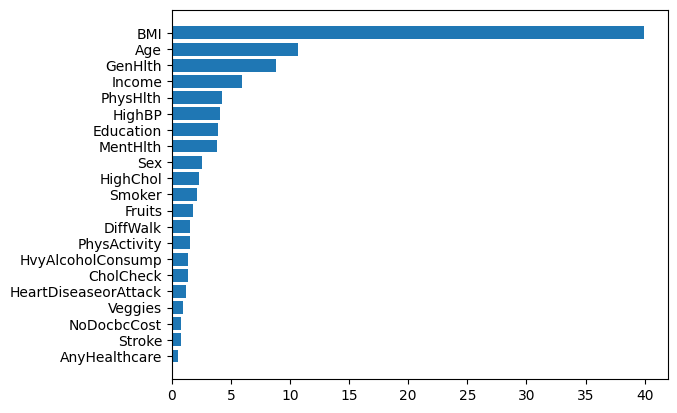

In [10]:
importances = model2.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X2_train.columns)[indices])

Мне ничего не нравится. Попробуем по-другому

In [11]:
important_indices = indices[:5] # удалим наименее важные признаки
cols = X2_train.columns[important_indices]
data_important = data.drop(columns=cols)

data_important

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [65]:
sm = SMOTE(
    sampling_strategy={1: 15_000}, #data: 0.0-213703; 1.0-4631; 2.0-35346; #y2_train: 0.0-171086; 2.0-28135; 1.0-3723
    random_state=None,        
    k_neighbors=3,            
    n_jobs=1                  
)


X3 = data_important.drop(columns = ['Diabetes_012'])  
y3 = data_important['Diabetes_012'].values

cat_features = [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15]
for col in X3.columns[cat_features].tolist():
    X3[col] = X3[col].astype(int)
#print(X3.dtypes)

X3_train, X3_test0, y3_train, y3_test0 = train_test_split(X3, y3, test_size=0.4, random_state=0)

X_res, y_res = sm.fit_resample(X3_train, y3_train)
model3 = CatBoostClassifier (
    iterations=10_000,
    depth=5,
    learning_rate=0.05,
    class_weights=[1,2,2],
    cat_features = cat_features,
)

model3.fit(X_res, y_res, eval_set=(X3_test, y3_test), early_stopping_rounds=100, verbose=100)

y3_pred = model3.predict(X3_test)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


0:	learn: 1.0643010	test: 1.0579053	best: 1.0579053 (0)	total: 451ms	remaining: 1h 15m 10s
100:	learn: 0.6911777	test: 0.5863927	best: 0.5863927 (100)	total: 39.4s	remaining: 1h 4m 20s
200:	learn: 0.6744035	test: 0.5804733	best: 0.5804349 (197)	total: 1m 18s	remaining: 1h 3m 57s
300:	learn: 0.6640261	test: 0.5789354	best: 0.5789354 (300)	total: 1m 57s	remaining: 1h 3m 7s
400:	learn: 0.6543995	test: 0.5773680	best: 0.5773537 (395)	total: 2m 35s	remaining: 1h 2m 6s
500:	learn: 0.6470670	test: 0.5761524	best: 0.5761473 (499)	total: 3m 12s	remaining: 1h 54s
600:	learn: 0.6427803	test: 0.5758902	best: 0.5757237 (572)	total: 3m 50s	remaining: 1h 7s
700:	learn: 0.6400570	test: 0.5754004	best: 0.5754004 (700)	total: 4m 28s	remaining: 59m 17s
800:	learn: 0.6374194	test: 0.5753229	best: 0.5753009 (790)	total: 5m 6s	remaining: 58m 44s
900:	learn: 0.6355861	test: 0.5749786	best: 0.5749774 (884)	total: 5m 44s	remaining: 58m 3s
1000:	learn: 0.6332136	test: 0.5750822	best: 0.5748641 (956)	total: 6m 2

In [66]:
print(classification_report(y3_test, y3_pred))
print(model3.score(X3_train, y3_train))
print(model3.score(X3_test, y3_test))
#print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     42617
         1.0       0.05      0.04      0.04       908
         2.0       0.46      0.44      0.45      7211

    accuracy                           0.83     50736
   macro avg       0.47      0.46      0.47     50736
weighted avg       0.82      0.83      0.82     50736

0.8309977136549984
0.8266122674235257


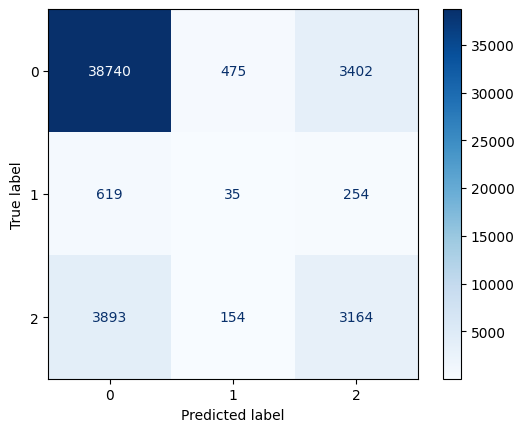

In [67]:
cm = confusion_matrix(y3_test, y3_pred)  # Матрица ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Визуализация
plt.show()

Построим метамодель

In [68]:

X_valid, X_test, y_valid, y_test = train_test_split(X3_tset0, y3_test0, test_size=0.4, random_state=42)


meta_features = model3.predict_proba(X_valid) # model3.predict_proba(X_valid)[:, [0, 2]]  # Берём только 1-й и 3-й класс
# meta_features

meta_model = CatBoostClassifier (
    iterations=10_000,
    depth=5,
    learning_rate=0.05,
    verbose=100, 
    early_stopping_rounds=50
)
# meta_model = LogisticRegression()
meta_model.fit(meta_features, y_valid)


meta_test = model3.predict_proba(X_test) 

final_preds = meta_model.predict(meta_test)


0:	learn: 1.0334900	total: 22.1ms	remaining: 3m 40s
100:	learn: 0.3763319	total: 2.27s	remaining: 3m 42s
200:	learn: 0.3743827	total: 4.52s	remaining: 3m 40s
300:	learn: 0.3737454	total: 6.8s	remaining: 3m 39s
400:	learn: 0.3731514	total: 9.03s	remaining: 3m 36s
500:	learn: 0.3726362	total: 11.3s	remaining: 3m 33s
600:	learn: 0.3721803	total: 13.5s	remaining: 3m 31s
700:	learn: 0.3717455	total: 15.7s	remaining: 3m 28s
800:	learn: 0.3713419	total: 18s	remaining: 3m 26s
900:	learn: 0.3709300	total: 20.5s	remaining: 3m 26s
1000:	learn: 0.3705557	total: 23.1s	remaining: 3m 27s
1100:	learn: 0.3702025	total: 25.3s	remaining: 3m 24s
1200:	learn: 0.3698479	total: 27.5s	remaining: 3m 21s
1300:	learn: 0.3694990	total: 29.8s	remaining: 3m 18s
1400:	learn: 0.3691862	total: 32s	remaining: 3m 16s
1500:	learn: 0.3688852	total: 34.2s	remaining: 3m 13s
1600:	learn: 0.3685891	total: 36.4s	remaining: 3m 10s
1700:	learn: 0.3683062	total: 38.6s	remaining: 3m 8s
1800:	learn: 0.3680584	total: 40.8s	remaining

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     68506
         1.0       0.63      0.14      0.23      1529
         2.0       0.54      0.19      0.28     11143

    accuracy                           0.85     81178
   macro avg       0.68      0.43      0.48     81178
weighted avg       0.82      0.85      0.82     81178



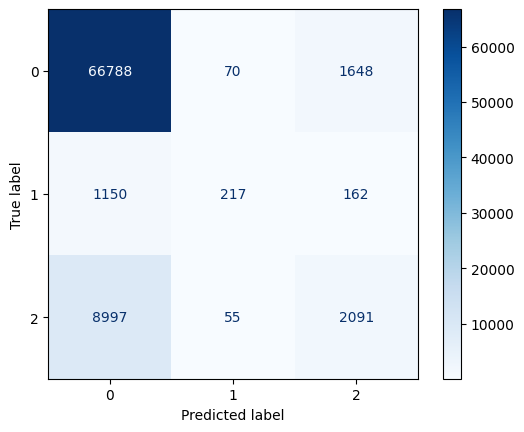

In [73]:
print(classification_report(y_test, final_preds))

cm = confusion_matrix(y_test, final_preds)  # Матрица ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Визуализация
plt.show()

Оставим так